<img src="logoUB.svg"  style="max-width:20%">

# Final project Machine Learning 2019-2020
#### Master in Innovation and Entrepreneurship in Biomedical Engineering
##### Authors: Arantxa Palma Rotaeche, Mónica Tuta

<center>
<h4>
    Heart disease binary classification from clinical data
    </h4> 
<img src="heartDesease.jpg"  style="max-width:30%">
</center>

## Contents

1. [Problem description](#pd)
1. [Upload data](#ud)
1. [Data description](#dd)
1. [Data exploration and preprocessing](#de)
    1. Identify the data types
    1. Identify and treat "NaN" values
    1. Visualization:
        1. Numeric:
            1. Correlation
            1. Distribution
            1. Histograms
            1. Scatterplot
        1. Categoric:
            1. Frequency
    1. Label encoding for categorical data
    1. Data normalization
    1. Feature Selection
    1. Dimensionality reduction
        1. PCA
        1. LDA
1. Modeling (For each one, theoretical background + model)
    1. KNN
    1. Bayesian methods
    1. Logistic regression
    1. Decission trees
    1. Random Forest
    1. SVM
1. Test and validation
1. Conclusions (Summary)

### Problem Description <a class="anchor" id="pd"></a>

According to the World Health Organization, cardiovascular diseases (CVDs) are the **number 1** cause of death globally, around **17.9 million** people die each year, **31%** of the deaths worldwide. More than **75%** of the cases occur in low and middle income countries and **85%** are due to heart attacks and strokes. CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions.<br>

Individuals at risk of CVD may demonstrate raised blood pressure, glucose, and lipids as well as overweight and obesity. Millions of people worldwide struggle to control the risk factors that lead to cardiovascular disease, many others remain unaware that they are at high risk. Many heart attacks and strokes can be prevented by controlling major risk factors through lifestyle interventions and drug treatment where necessary.<br>

The risk factors for CVD include behavioral factors, such as tobacco use, an unhealthy diet, harmful use of alcohol and inadequate physical activity, and physiological factors, including high blood pressure (hypertension), high blood cholesterol and high blood sugar or glucose which are linked to underlying social determinants and drivers, such as ageing, income and urbanization.<br>

*Identifying those at highest risk of CVDs and ensuring they receive appropriate treatment can prevent premature deaths. One way is to perform analyses (quantitative) to predict or classify whether the population are prone to CVDs according to significantly health features and act on them in advance*

### Upload Data <a class="anchor" id="ud"></a>

In [1]:
## Upload dataset
heart <- read.csv(file = 'heart.csv')
head(heart)

print('Dimension of the dataset')
dim(heart)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


[1] "Dimension of the dataset"


[1] 303  14

### Data description <a class="anchor" id="dd"></a>

#### Contents

- age - age in years
- **sex** - (1 = male; 0 = female)
- **cp** - chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- chol - serum cholestoral in mg/dl
- **fbs** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg - resting electrocardiographic results (0= normal, 1= having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV), 2= showing probable or definite left ventricular hypertrophy)
- thalach - maximum heart rate achieved
- **exang** - exercise induced angina (1 = yes; 0 = no)
- oldpeak - ST depression induced by exercise relative to rest
- **slope** - the slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)
- ca - number of major vessels (0-3) colored by flourosopy
- **thal** - (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target** - have disease or not (1=yes, 0=no)


**Bold** features are categorical

***Creators***:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
1. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Donor: David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

#### Summary

In [2]:
summary(heart)

      age             sex               cp           trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.000   Min.   : 94.0  
 1st Qu.:47.50   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:120.0  
 Median :55.00   Median :1.0000   Median :1.000   Median :130.0  
 Mean   :54.37   Mean   :0.6832   Mean   :0.967   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.000   Max.   :200.0  
      chol            fbs            restecg          thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :240.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.3   Mean   :0.1485   Mean   :0.5281   Mean   :149.6  
 3rd Qu.:274.5   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak         slope             ca        
 Mi

### Data Exploration <a class="anchor" id="de"></a>

#### Identify Data Type

In [3]:
## Data exploration
str(heart)

'data.frame':	303 obs. of  14 variables:
 $ age     : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : int  1 1 0 1 0 1 0 1 1 1 ...
 $ cp      : int  3 2 1 1 0 0 1 1 2 2 ...
 $ trestbps: int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs     : int  1 0 0 0 0 0 0 0 1 0 ...
 $ restecg : int  0 1 0 1 1 1 0 1 1 1 ...
 $ thalach : int  150 187 172 178 163 148 153 173 162 174 ...
 $ exang   : int  0 0 0 0 1 0 0 0 0 0 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slope   : int  0 0 2 2 2 1 1 2 2 2 ...
 $ ca      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thal    : int  1 2 2 2 2 1 2 3 3 2 ...
 $ target  : int  1 1 1 1 1 1 1 1 1 1 ...


#### Identify and treat "NaN" values

In [4]:
#is.na(heart)
sum(is.na(heart))

[1] 0

There are not NaN values in the dataset

#### Visualization

In [5]:
warning=FALSE #Hide warnings

#Load libraries
library(ggpubr)
library(tidyverse)
library(Hmisc)
library(corrplot)
library(purrr)
library(tidyr)
library(ggplot2)
library(dplyr)
library(gridExtra)
library(dummies)

Loading required package: ggplot2


Loading required package: magrittr


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──


✔ tibble  3.0.0     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract()   masks magrittr::extract()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ purrr::set_names() masks magrittr::set_names()


Loading required package: lattice


Loading required package: survival



Attaching package: ‘survival’



The following object is masked _by_ ‘.GlobalEnv’:

    heart



Loading required package: Formula



Attaching package: ‘Hmisc’



The following objects are masked from ‘package:dplyr’:

    src, summarize



The following objects are masked from ‘package:base’:

    format.pval, units



corrplot 0.84 loaded



Attaching package: ‘gridExtra’



The following object is masked from ‘package:dplyr’:

    combine



dummies-1.5.6 provided by Decision Patterns



##### Numeric

###### Correlation

In [6]:
# Dataframe with only numeric variables
heart_numeric <- heart[ , -which(names(heart) %in% c("sex","cp","fbs","exang","slope","thal"))]
dim(heart_numeric)

[1] 303   8

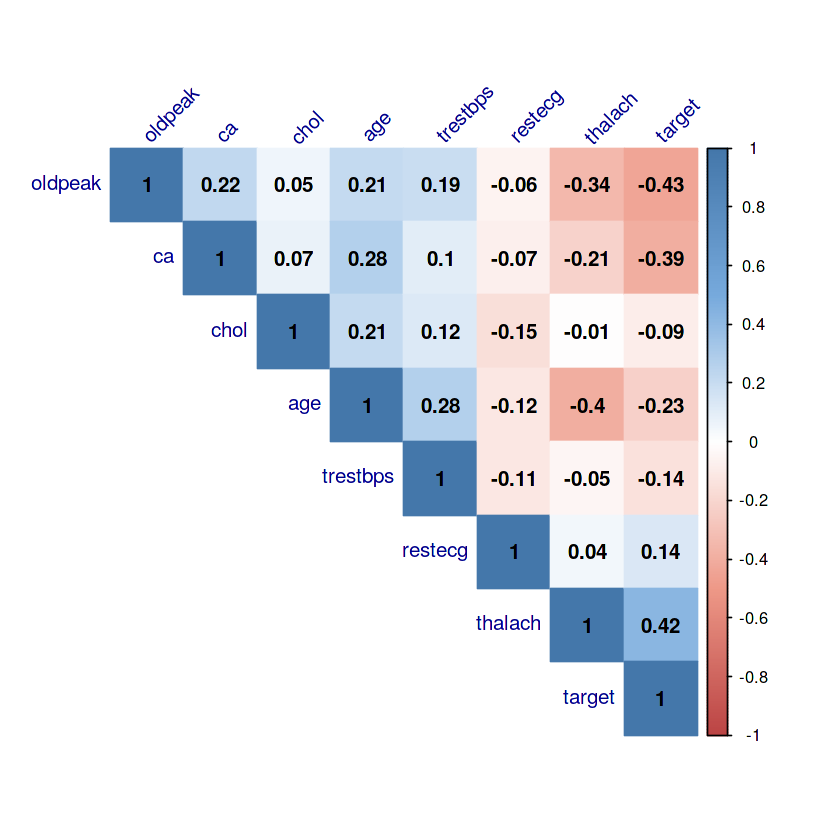

In [7]:
# Correlation matrix and plot
correlation <- cor(heart_numeric)
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
corrplot(correlation, method = "color", col = col(200),
         type = "upper", order = "hclust",
         addCoef.col = "black", # Add coefficient of correlation
         tl.col = "darkblue", tl.srt = 45, #Text label color and rotation
         )

###### Distribution - Histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


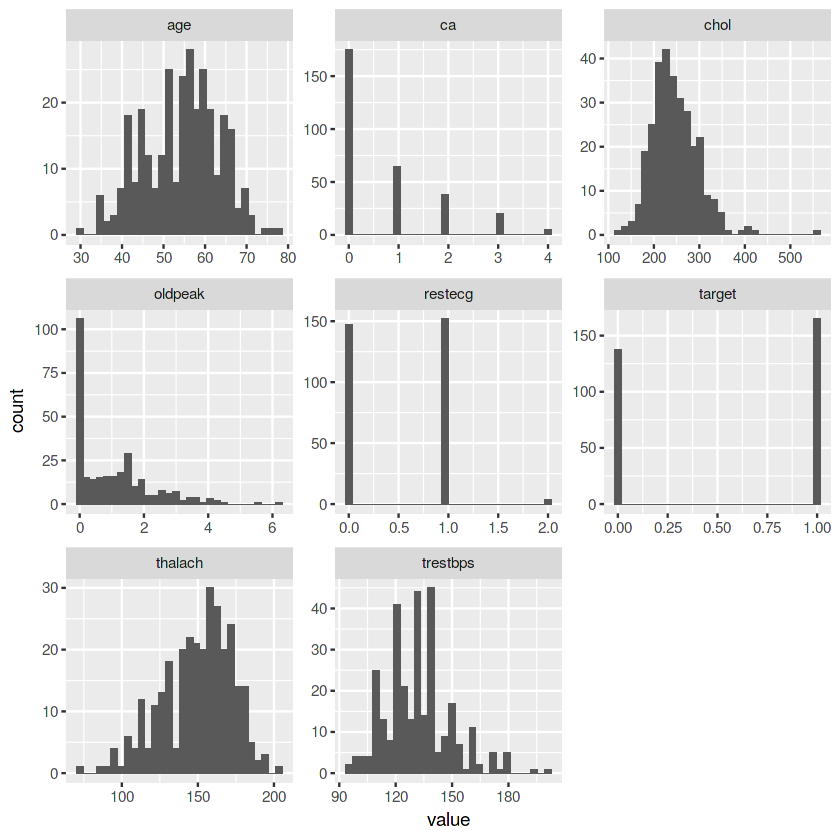

In [8]:
heart_numeric %>%
  gather() %>%
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") +
    geom_histogram()

###### Scatterplot

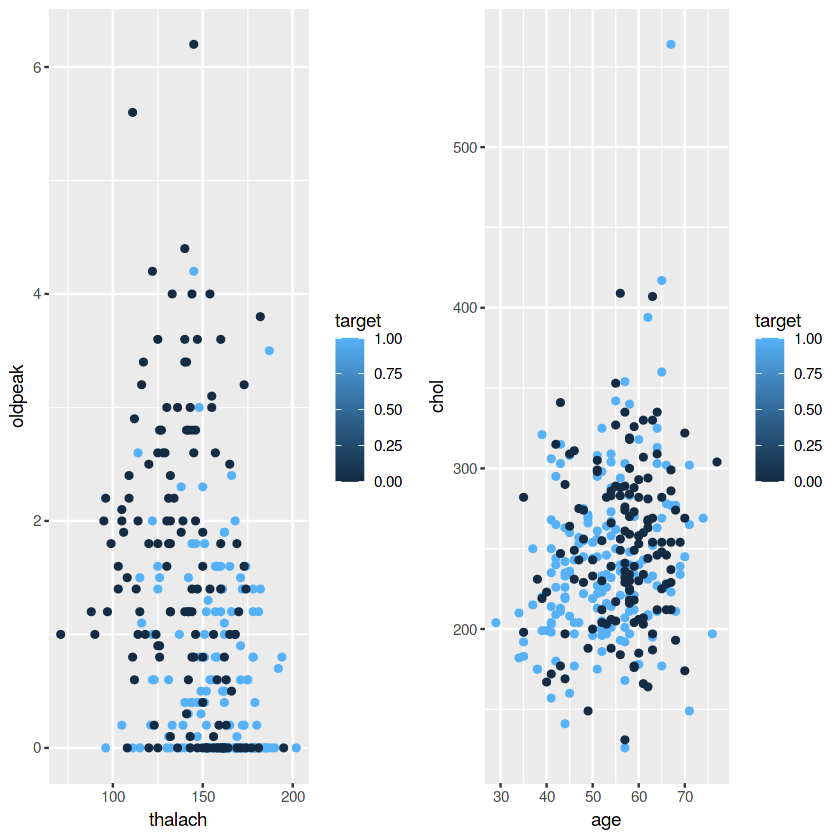

In [9]:
# Scatter plot comparing thalach-oldpeak and age-chol, with color representing target
p1 <- ggplot(heart_numeric,aes(x=thalach, y=oldpeak, color=target))+
geom_point()
p2 <- ggplot(heart_numeric,aes(x=age, y=chol, color=target))+
geom_point()
grid.arrange(p1, p2, nrow = 1)#subplot

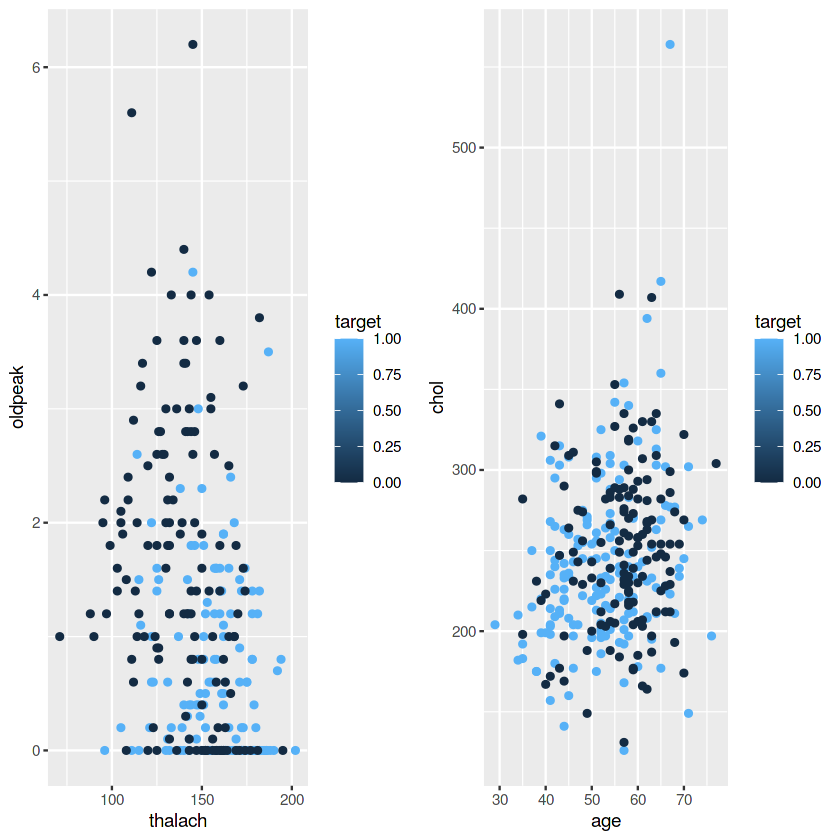

In [10]:
ggarrange(p1, p2, nrow = 1)#subplot

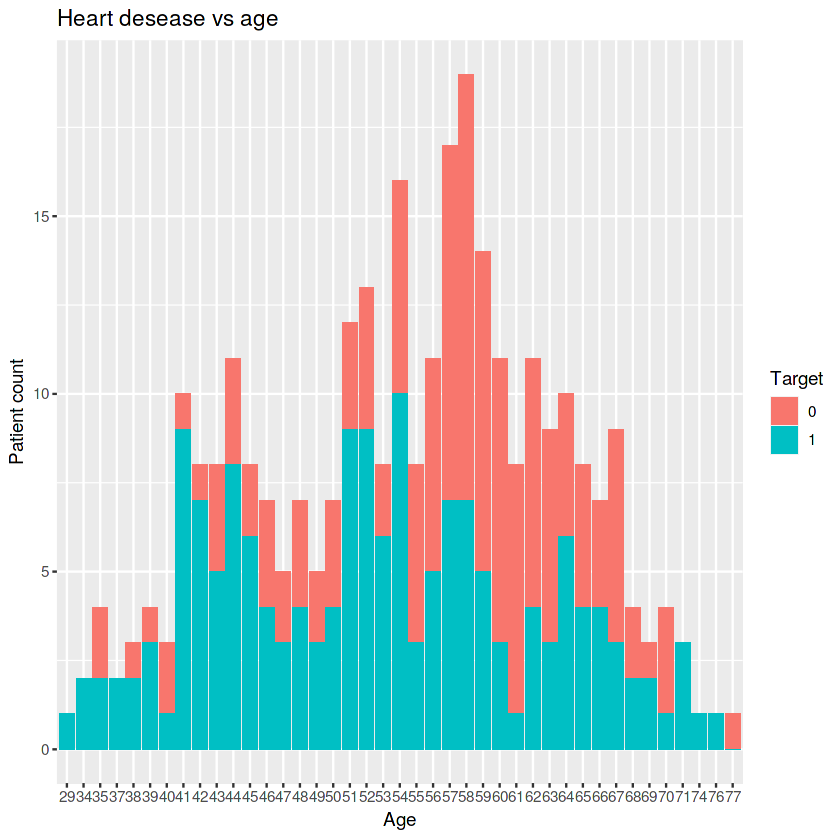

In [11]:
ggplot(as.data.frame(table(heart_numeric$age,heart_numeric$target)), aes(x = Var1, y = Freq, fill = Var2)) +
    geom_bar(stat="identity")+
   labs(y = "Patient count",
         x = "Age",
         fill = "Target",
         title = "Heart desease vs age")

In [12]:
age_bins <- c(20,30,40,50,60,70,80) #bins for age
age_cut <- cut(heart_numeric$age, age_bins) #Divide the interval with the bins

trestbps_bins <- c(80,100,120,140,160,180) #bins for trestbps
trestbps_cut <- cut(heart_numeric$trestbps, trestbps_bins) #Divide the interval with the bins

chol_bins <- c(100,150,200,250,300,350,400,450) #bins for trestbps
chol_cut <- cut(heart_numeric$chol, chol_bins) #Divide the interval with the bins

thalach_bins <- c(60,80,100,120,140,160,180,200,220) #bins for trestbps
thalach_cut <- cut(heart_numeric$thalach, thalach_bins) #Divide the interval with the bins

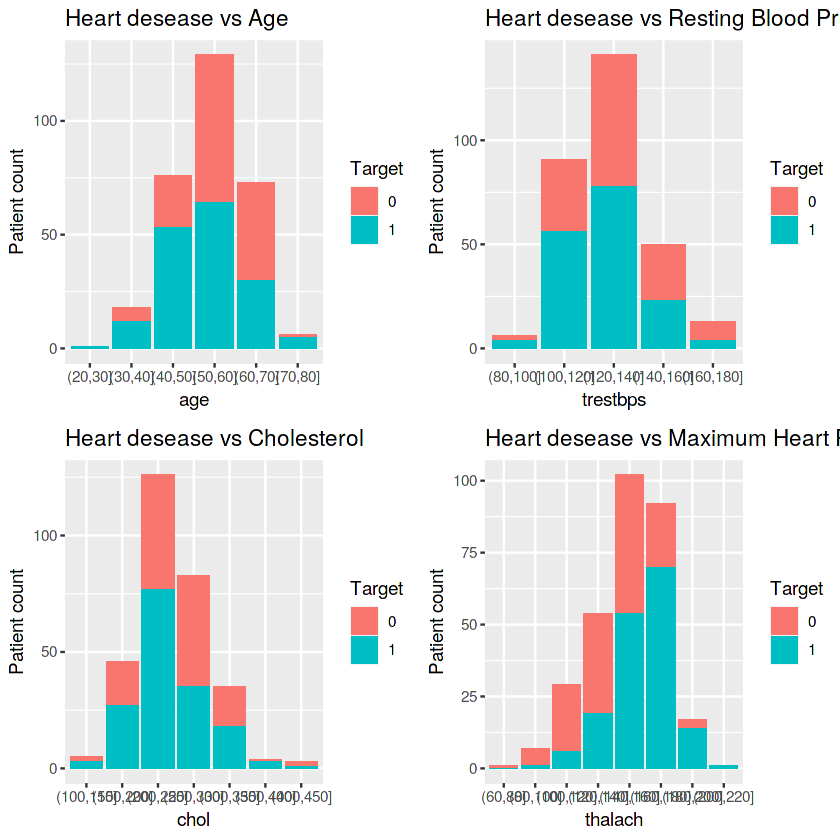

In [13]:
p_age <- ggplot(as.data.frame(table(age_cut,heart_numeric$target)), aes(x = age_cut, y = Freq, fill = Var2)) +
            geom_bar(stat="identity")+
               labs(y = "Patient count",
                     x = "age",
                     fill = "Target",
                     title = "Heart desease vs Age")
p_trestbps <- ggplot(as.data.frame(table(trestbps_cut,heart_numeric$target)), aes(x = trestbps_cut, y = Freq, fill = Var2)) +
            geom_bar(stat="identity")+
               labs(y = "Patient count",
                     x = "trestbps",
                     fill = "Target",
                     title = "Heart desease vs Resting Blood Pressure ")
p_chol <- ggplot(as.data.frame(table(chol_cut,heart_numeric$target)), aes(x = chol_cut, y = Freq, fill = Var2)) +
            geom_bar(stat="identity")+
               labs(y = "Patient count",
                     x = "chol",
                     fill = "Target",
                     title = "Heart desease vs Cholesterol")
p_thalach <- ggplot(as.data.frame(table(thalach_cut,heart_numeric$target)), aes(x = thalach_cut, y = Freq, fill = Var2)) +
            geom_bar(stat="identity")+
               labs(y = "Patient count",
                     x = "thalach",
                     fill = "Target",
                     title = "Heart desease vs Maximum Heart Rate")

#subplots
grid.arrange(p_age, p_trestbps, p_chol, p_thalach, nrow = 2)

##### Categoric

###### Frequency

In [14]:
library(dplyr)

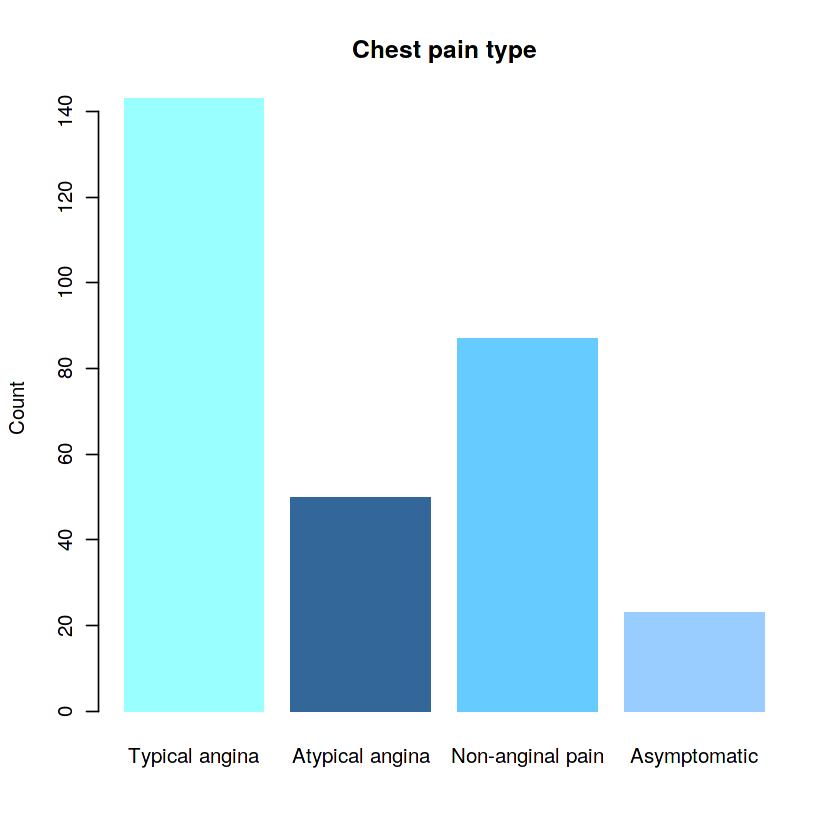

In [15]:
barplot(table(heart$cp), ylab = "Count",border = NA,
        main = "Chest pain type",col=c("#99FFFF","#336699","#66CCFF","#99CCFF"),names.arg=c("Typical angina", "Atypical angina","Non-anginal pain","Asymptomatic"))

In [16]:
#Correlation cp with other categorical variables
chisq.test(heart$cp, heart$sex)
chisq.test(heart$cp, heart$fbs)
chisq.test(heart$cp, heart$exang)
chisq.test(heart$cp, heart$slope)
chisq.test(heart$cp, heart$thal)
chisq.test(heart$cp, heart$target)


	Pearson's Chi-squared test

data:  heart$cp and heart$sex
X-squared = 6.8221, df = 3, p-value = 0.07779


Warning message in chisq.test(heart$cp, heart$fbs):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  heart$cp and heart$fbs
X-squared = 3.8856, df = 3, p-value = 0.2741



	Pearson's Chi-squared test

data:  heart$cp and heart$exang
X-squared = 67.348, df = 3, p-value = 1.577e-14


Warning message in chisq.test(heart$cp, heart$slope):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  heart$cp and heart$slope
X-squared = 27.747, df = 6, p-value = 0.0001048


Warning message in chisq.test(heart$cp, heart$thal):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  heart$cp and heart$thal
X-squared = 41.892, df = 9, p-value = 3.439e-06



	Pearson's Chi-squared test

data:  heart$cp and heart$target
X-squared = 81.686, df = 3, p-value < 2.2e-16


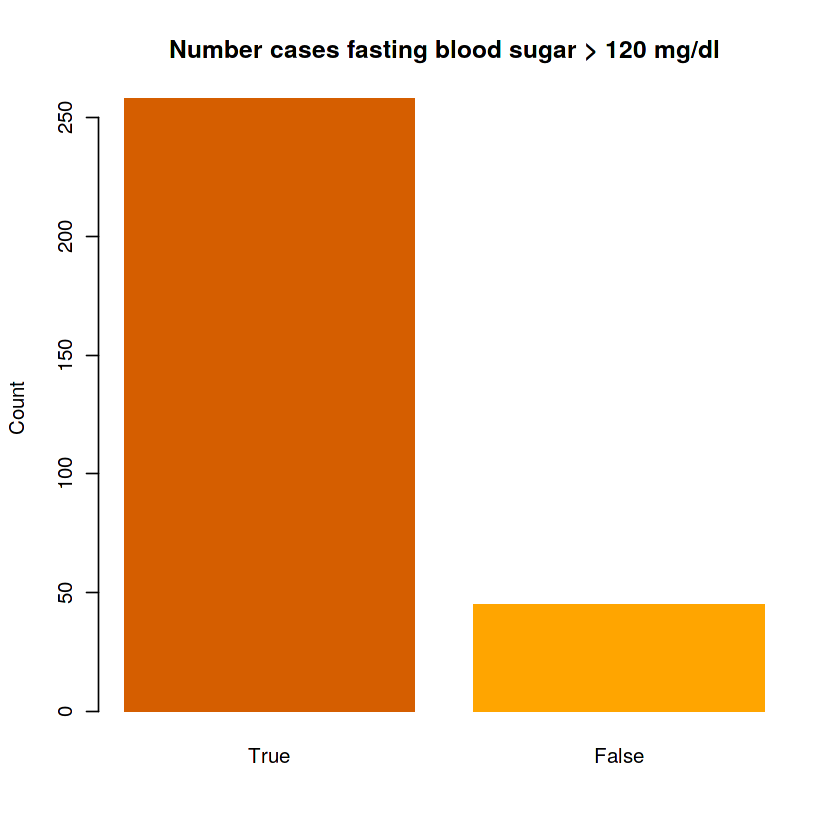

In [17]:
barplot(table(heart$fbs), ylab = "Count",border = NA,
        main = "Number cases fasting blood sugar > 120 mg/dl",col=c("#D55E00","orange"),names.arg=c("True", "False"))

In [18]:
#Correlation fbs with other categorical variables
chisq.test(heart$fbs, heart$sex)
chisq.test(heart$fbs, heart$cp)
chisq.test(heart$fbs, heart$exang)
chisq.test(heart$fbs, heart$slope)
chisq.test(heart$fbs, heart$thal)
chisq.test(heart$fbs, heart$target)


	Pearson's Chi-squared test with Yates' continuity correction

data:  heart$fbs and heart$sex
X-squared = 0.3724, df = 1, p-value = 0.5417


Warning message in chisq.test(heart$fbs, heart$cp):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  heart$fbs and heart$cp
X-squared = 3.8856, df = 3, p-value = 0.2741



	Pearson's Chi-squared test with Yates' continuity correction

data:  heart$fbs and heart$exang
X-squared = 0.075367, df = 1, p-value = 0.7837


Warning message in chisq.test(heart$fbs, heart$slope):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  heart$fbs and heart$slope
X-squared = 3.3734, df = 2, p-value = 0.1851


Warning message in chisq.test(heart$fbs, heart$thal):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  heart$fbs and heart$thal
X-squared = 5.542, df = 3, p-value = 0.1361



	Pearson's Chi-squared test with Yates' continuity correction

data:  heart$fbs and heart$target
X-squared = 0.10627, df = 1, p-value = 0.7444


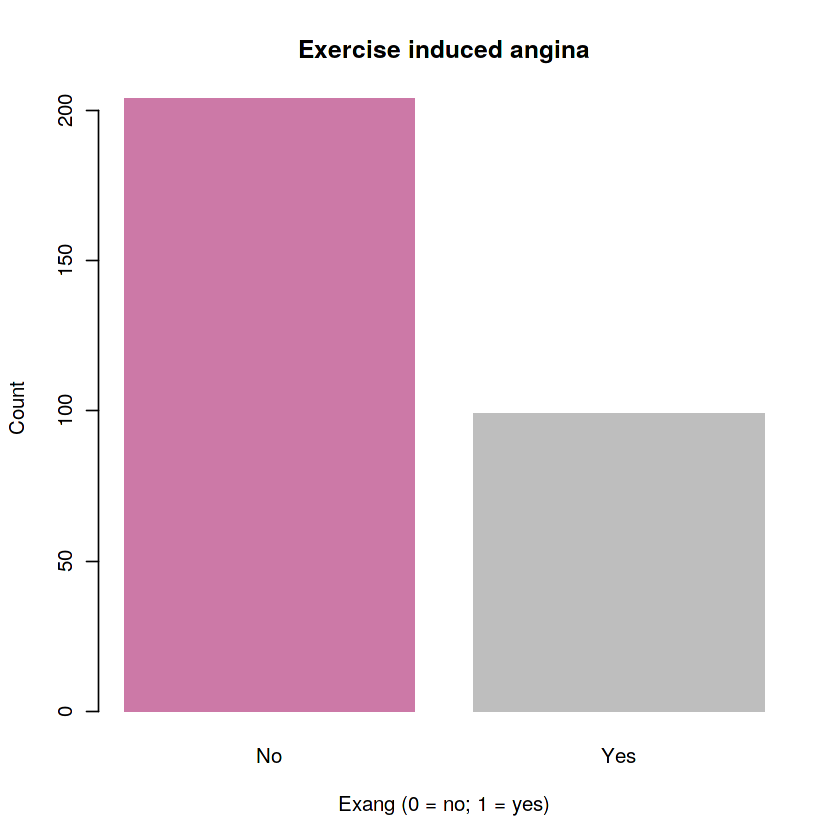

In [19]:
barplot(table(heart$exang), xlab = "Exang (0 = no; 1 = yes)", ylab = "Count",border = NA,
        main = "Exercise induced angina",col=c("#CC79A7","gray"),names.arg=c("No", "Yes"))

In [20]:
#Correlation exang with other categorical variables
chisq.test(heart$exang, heart$sex)
chisq.test(heart$exang, heart$fbs)
chisq.test(heart$exang, heart$cp)
chisq.test(heart$exang, heart$slope)
chisq.test(heart$exang, heart$thal)
chisq.test(heart$exang, heart$target)


	Pearson's Chi-squared test with Yates' continuity correction

data:  heart$exang and heart$sex
X-squared = 5.4489, df = 1, p-value = 0.01958



	Pearson's Chi-squared test with Yates' continuity correction

data:  heart$exang and heart$fbs
X-squared = 0.075367, df = 1, p-value = 0.7837



	Pearson's Chi-squared test

data:  heart$exang and heart$cp
X-squared = 67.348, df = 3, p-value = 1.577e-14



	Pearson's Chi-squared test

data:  heart$exang and heart$slope
X-squared = 25.131, df = 2, p-value = 3.49e-06


Warning message in chisq.test(heart$exang, heart$thal):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  heart$exang and heart$thal
X-squared = 32.959, df = 3, p-value = 3.285e-07



	Pearson's Chi-squared test with Yates' continuity correction

data:  heart$exang and heart$target
X-squared = 55.945, df = 1, p-value = 7.454e-14


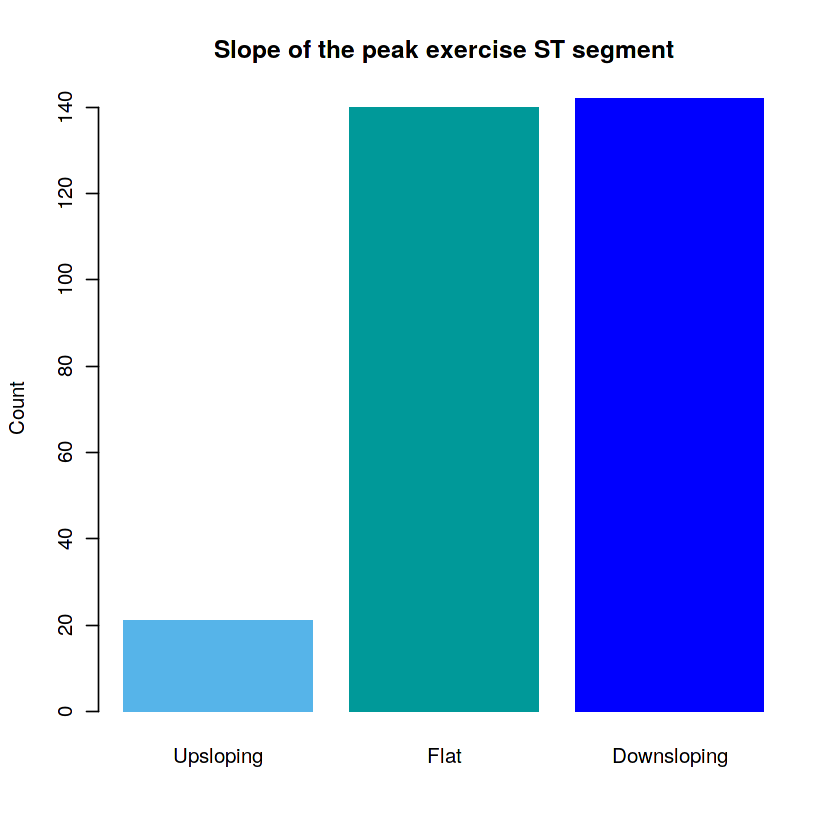

In [21]:
barplot(table(heart$slope),ylab = "Count",border = NA,
        main = "Slope of the peak exercise ST segment",col=c("#56B4E9","#009999", "#0000FF"), names.arg=c("Upsloping", "Flat","Downsloping"))

In [22]:
#Correlation slope with other categorical variables
chisq.test(heart$slope, heart$sex)
chisq.test(heart$slope, heart$fbs)
chisq.test(heart$slope, heart$exang)
chisq.test(heart$slope, heart$cp)
chisq.test(heart$slope, heart$thal)
chisq.test(heart$slope, heart$target)


	Pearson's Chi-squared test

data:  heart$slope and heart$sex
X-squared = 0.64832, df = 2, p-value = 0.7231


Warning message in chisq.test(heart$slope, heart$fbs):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  heart$slope and heart$fbs
X-squared = 3.3734, df = 2, p-value = 0.1851



	Pearson's Chi-squared test

data:  heart$slope and heart$exang
X-squared = 25.131, df = 2, p-value = 3.49e-06


Warning message in chisq.test(heart$slope, heart$cp):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  heart$slope and heart$cp
X-squared = 27.747, df = 6, p-value = 0.0001048


Warning message in chisq.test(heart$slope, heart$thal):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  heart$slope and heart$thal
X-squared = 35.283, df = 6, p-value = 3.798e-06



	Pearson's Chi-squared test

data:  heart$slope and heart$target
X-squared = 47.507, df = 2, p-value = 4.831e-11


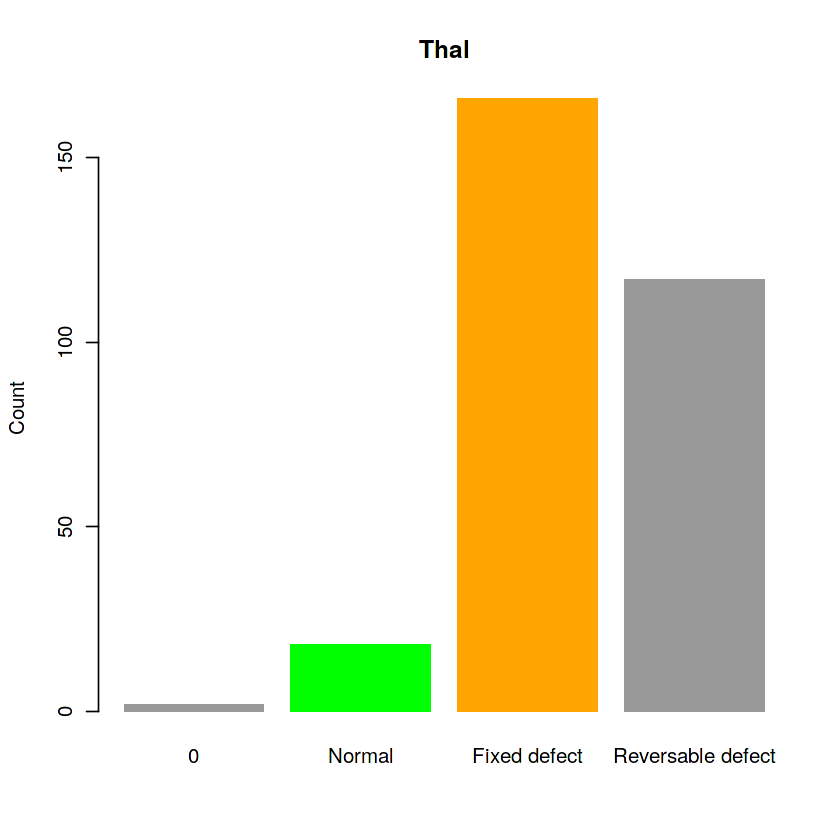

In [23]:
barplot(table(heart$thal), ylab = "Count",border = NA,
        main = "Thal",col=c("#999999","green","orange"), names.arg=c("0", "Normal","Fixed defect","Reversable defect"))

In [24]:
#Correlation cp with other categorical variables
chisq.test(heart$thal, heart$sex)
chisq.test(heart$thal, heart$fbs)
chisq.test(heart$thal, heart$exang)
chisq.test(heart$thal, heart$slope)
chisq.test(heart$thal, heart$cp)
chisq.test(heart$thal, heart$target)

Warning message in chisq.test(heart$thal, heart$sex):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  heart$thal and heart$sex
X-squared = 44.626, df = 3, p-value = 1.111e-09


Warning message in chisq.test(heart$thal, heart$fbs):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  heart$thal and heart$fbs
X-squared = 5.542, df = 3, p-value = 0.1361


Warning message in chisq.test(heart$thal, heart$exang):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  heart$thal and heart$exang
X-squared = 32.959, df = 3, p-value = 3.285e-07


Warning message in chisq.test(heart$thal, heart$slope):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  heart$thal and heart$slope
X-squared = 35.283, df = 6, p-value = 3.798e-06


Warning message in chisq.test(heart$thal, heart$cp):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  heart$thal and heart$cp
X-squared = 41.892, df = 9, p-value = 3.439e-06


Warning message in chisq.test(heart$thal, heart$target):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  heart$thal and heart$target
X-squared = 85.304, df = 3, p-value < 2.2e-16


##### Target

###### Frequency

In [25]:
heart%>% count(target)
(tableTargetSex <- heart%>% count(target,sex))
str(tableTargetSex)
(TargetSex<-as.data.frame(tableTargetSex))

target,n
<int>,<int>
0,138
1,165


target,sex,n
<int>,<int>,<int>
0,0,24
0,1,114
1,0,72
1,1,93


tibble [4 × 3] (S3: tbl_df/tbl/data.frame)
 $ target: int [1:4] 0 0 1 1
 $ sex   : int [1:4] 0 1 0 1
 $ n     : int [1:4] 24 114 72 93


target,sex,n
<int>,<int>,<int>
0,0,24
0,1,114
1,0,72
1,1,93


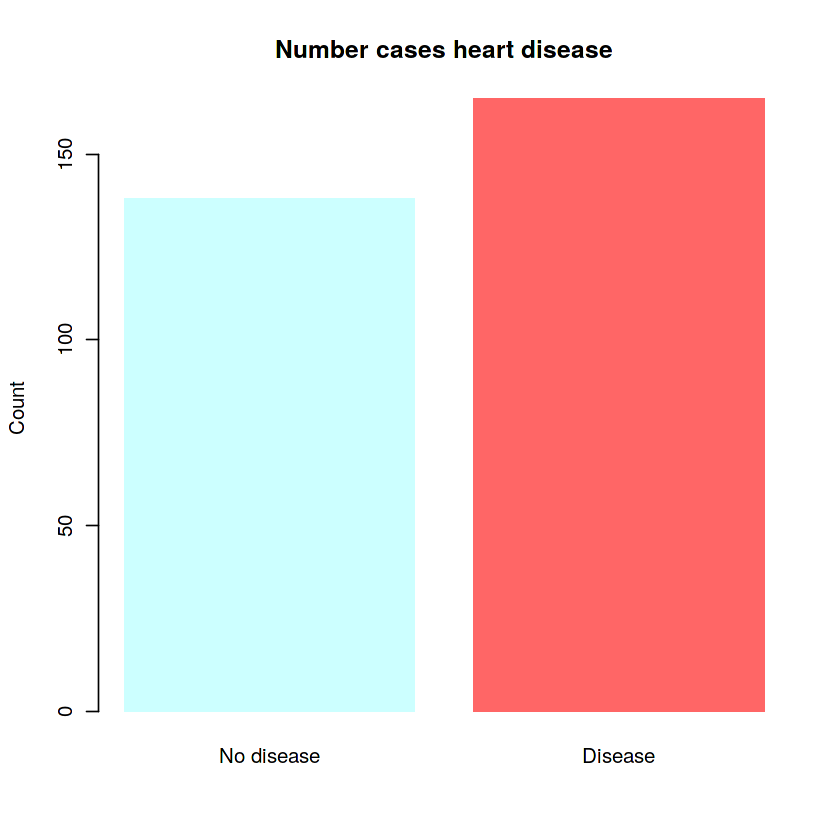

In [26]:
barplot(table(heart$target), ylab = "Count",border = NA,
        main = "Number cases heart disease",col=c("#CCFFFF","#FF6666"),names.arg=c("No disease", "Disease"))

In [27]:
Nodisease <- sum(heart$target == 0)
Disease <- sum(heart$target == 1)
Totaltarget <- length(heart$target)
PercNodisease <- round(Nodisease*100/Totaltarget)
Percdisease <- round(Disease*100/Totaltarget)
paste("Percentage of patients that do not have heart disease: ",PercNodisease,"%")
paste("Percentage of patients that have heart disease: ",Percdisease,"%")

[1] "Percentage of patients that do not have heart disease:  46 %"

[1] "Percentage of patients that have heart disease:  54 %"

In [28]:
(tableheartsex <- heart%>% count(sex))
(Sex<-as.data.frame(tableheartsex))
ggplot(Sex, aes(x=factor(sex), y=n)) + 
  geom_bar(stat = "identity", position="dodge")+scale_fill_hue(c = 40) +
  theme(legend.position="none")+ geom_col(fill = "#E69F00", "#56B4E9")

sex,n
<int>,<int>
0,96
1,207


sex,n
<int>,<int>
0,96
1,207


ERROR: Error: `mapping` must be created by `aes()`


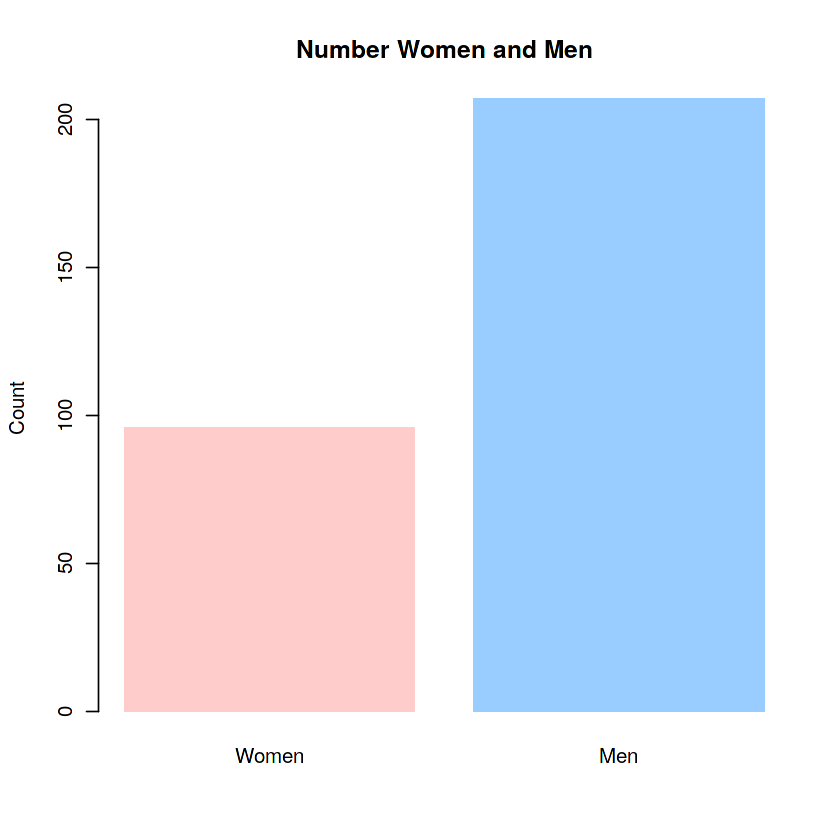

In [29]:
barplot(table(heart$sex), ylab = "Count",border = NA,
        main = "Number Women and Men",col=c("#FFCCCC","#99CCFF"), names.arg=c("Women", "Men"))

In [30]:
#Number of no disease cases by Sex
Nodiseasefemale <- sum(heart$target == 0 & heart$sex==0)
Nodiseasemale <- sum(heart$target == 0 & heart$sex==1)
paste("Number of Female patients with no heart disease: ",Nodiseasefemale)
paste("Number of Male patients with no heart disease: ",Nodiseasemale)
#Number of disease cases by Sex
Diseasefemale <- sum(heart$target == 1 & heart$sex==0)
Diseasemale <- sum(heart$target == 1 & heart$sex==1)
paste("Number of Female patients heart disease: ",Diseasefemale)
paste("Number of Male patients with heart disease: ",Diseasemale)

[1] "Number of Female patients with no heart disease:  24"

[1] "Number of Male patients with no heart disease:  114"

[1] "Number of Female patients heart disease:  72"

[1] "Number of Male patients with heart disease:  93"

In [31]:
library(ggplot2)

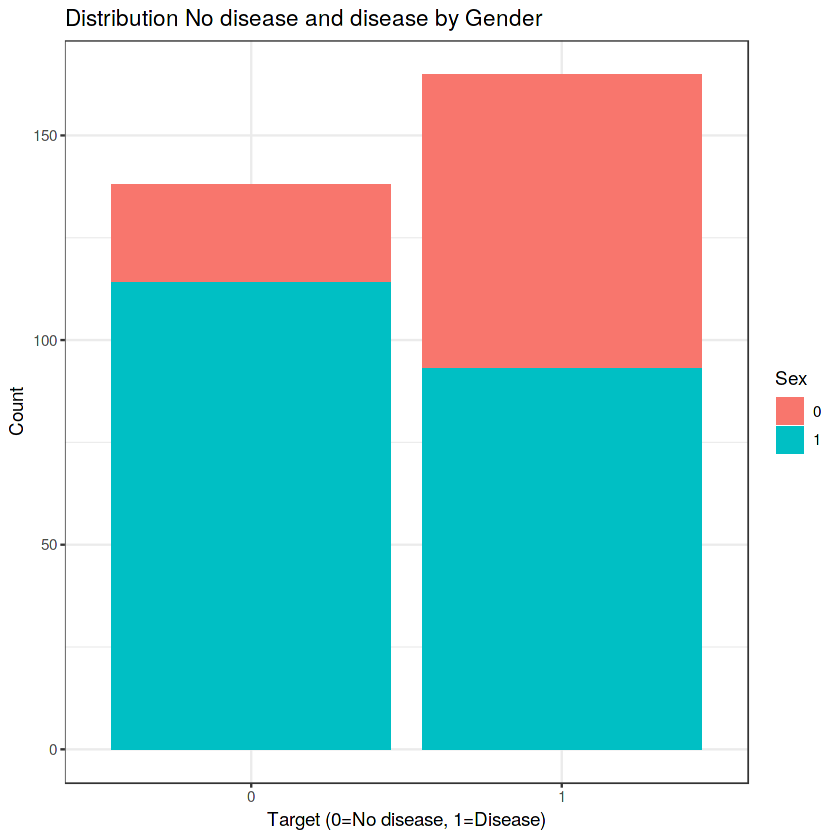

In [32]:
Sex <- factor(heart$sex)
ggplot(data=heart)+geom_bar(aes(x=factor(target),fill=Sex))+ xlab("Target (0=No disease, 1=Disease)") + 
  ylab("Count")+ggtitle(label="Distribution No disease and disease by Gender")+  theme_bw()

In [33]:
library(ggplot2)
Gender <- factor(TargetSex$sex)
plotsextarget <- ggplot(TargetSex, aes(x=Gender, y=n, fill=factor(target)))+
  geom_bar(position="dodge", stat="identity")+
  xlab("Sex (0=Female, 1=Male)") + 
  ylab("Count")                 +
  ggtitle("Female and Male No Heart Disease vs Heart Disease ")  +
  theme_bw()

In [34]:
(TargetSex)

Positivecasesfemale <- TargetSex[ c(3), c(3)]
Positivecasesmale <- TargetSex[ c(4), c(3)]
Negativecasesfemale <- TargetSex[ c(1), c(3)]
Negativecasesmale <- TargetSex[ c(2), c(3)]
(CountPosNegSex <- matrix(c(Positivecasesfemale,Positivecasesmale, Negativecasesfemale,Negativecasesmale), nrow = 2, dimnames = list(Grupo = c("Female", "Male"), Target= c("Yes", "No"))))
prop.table(CountPosNegSex,margin=1)
prop.test(CountPosNegSex)


target,sex,n
<int>,<int>,<int>
0,0,24
0,1,114
1,0,72
1,1,93


,Yes,No
Female,72,24
Male,93,114


,Yes,No
Female,0.7500000,0.2500000
Male,0.4492754,0.5507246



	2-sample test for equality of proportions with continuity correction

data:  CountPosNegSex
X-squared = 22.717, df = 1, p-value = 1.877e-06
alternative hypothesis: two.sided
95 percent confidence interval:
 0.1831257 0.4183236
sample estimates:
   prop 1    prop 2 
0.7500000 0.4492754 


Conclusion: Although the proportion in Men is almost the double than in women, making an analysis if the proportion of women and men having disease is different, the P value accepted rejected the null hypothesis (<0.05) therefore the proportion is different. Therefore, although the proportion of women in the study was less, they showed more probability of having a disease.

In [35]:
library(ggplot2)
tableTargetcp <- heart%>% count(target,cp)
str(tableTargetcp)
(Targetcp<-as.data.frame(tableTargetcp))
ChestPain <- factor(Targetcp$cp)
plotcptarget <-ggplot(Targetcp, aes(x=factor(cp), y=n, fill=factor(target)))+
  geom_bar(position="dodge", stat="identity")+
  xlab(" chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)") + 
  ylab("Count")                 +
  ggtitle("Cp vs Heart Disease ")  +
  theme_bw()

tibble [8 × 3] (S3: tbl_df/tbl/data.frame)
 $ target: int [1:8] 0 0 0 0 1 1 1 1
 $ cp    : int [1:8] 0 1 2 3 0 1 2 3
 $ n     : int [1:8] 104 9 18 7 39 41 69 16


target,cp,n
<int>,<int>,<int>
0,0,104
0,1,9
0,2,18
0,3,7
1,0,39
1,1,41
1,2,69
1,3,16


In [36]:
tableTargetfbs <- heart%>% count(target,fbs)
str(tableTargetfbs)
(Targetfbs<-as.data.frame(tableTargetfbs))
Fastingbloodsugar<- factor(Targetfbs$fbs)
plotfbstarget<-ggplot(Targetfbs, aes(x=Fastingbloodsugar, y=n, fill=factor(target)))+
  geom_bar(position="dodge", stat="identity")+
  xlab("Fbs (0=False, 1=True)") + 
  ylab("Count")                 +
  ggtitle("Fasting blood sugar > 120 mg/dl vs Heart Disease ")  +
  theme_bw()

tibble [4 × 3] (S3: tbl_df/tbl/data.frame)
 $ target: int [1:4] 0 0 1 1
 $ fbs   : int [1:4] 0 1 0 1
 $ n     : int [1:4] 116 22 142 23


target,fbs,n
<int>,<int>,<int>
0,0,116
0,1,22
1,0,142
1,1,23


In [37]:
tableTargetexang <- heart%>% count(target,exang)
str(tableTargetfbs)
(Targetexang<-as.data.frame(tableTargetexang))
Exang<- factor(Targetexang$exang)
plottargetexang <- ggplot(Targetexang, aes(x=Exang, y=n, fill=factor(target)))+
  geom_bar(position="dodge", stat="identity")+
  xlab("Exercise induced angina (1 = yes; 0 = no)") + 
  ylab("Count")                 +
  ggtitle("Exercise induced angina vs Heart Disease ")  +
  theme_bw()


tibble [4 × 3] (S3: tbl_df/tbl/data.frame)
 $ target: int [1:4] 0 0 1 1
 $ fbs   : int [1:4] 0 1 0 1
 $ n     : int [1:4] 116 22 142 23


target,exang,n
<int>,<int>,<int>
0,0,62
0,1,76
1,0,142
1,1,23


In [38]:
tableTargetslope <- heart%>% count(target,slope)
str(tableTargetslope)
(Targetslope<-as.data.frame(tableTargetslope))
Slope<- factor(Targetslope$slope)
plottargetslope <- ggplot(Targetslope, aes(x=Slope, y=n, fill=factor(target)))+
  geom_bar(position="dodge", stat="identity")+
  xlab("The slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)") + 
  ylab("Count")                 +
  ggtitle("Slope vs Heart Disease ")  +
  theme_bw()

tibble [6 × 3] (S3: tbl_df/tbl/data.frame)
 $ target: int [1:6] 0 0 0 1 1 1
 $ slope : int [1:6] 0 1 2 0 1 2
 $ n     : int [1:6] 12 91 35 9 49 107


target,slope,n
<int>,<int>,<int>
0,0,12
0,1,91
0,2,35
1,0,9
1,1,49
1,2,107


In [39]:
tableTargetthal <- heart%>% count(target,thal)
str(tableTargetthal)
(Targetthal<-as.data.frame(tableTargetthal))
Thal<- factor(Targetthal$thal)
plottargetthal <- ggplot(Targetthal, aes(x=Thal, y=n, fill=factor(target)))+
  geom_bar(position="dodge", stat="identity")+
  xlab(" Thal (3 = normal; 6 = fixed defect; 7 = reversable defect)") + 
  ylab("Count")                 +
  ggtitle("Thal vs Heart Disease ")  +
  theme_bw()

tibble [8 × 3] (S3: tbl_df/tbl/data.frame)
 $ target: int [1:8] 0 0 0 0 1 1 1 1
 $ thal  : int [1:8] 0 1 2 3 0 1 2 3
 $ n     : int [1:8] 1 12 36 89 1 6 130 28


target,thal,n
<int>,<int>,<int>
0,0,1
0,1,12
0,2,36
0,3,89
1,0,1
1,1,6
1,2,130
1,3,28


$`1`

$`2`

attr(,"class")
[1] "list"      "ggarrange"

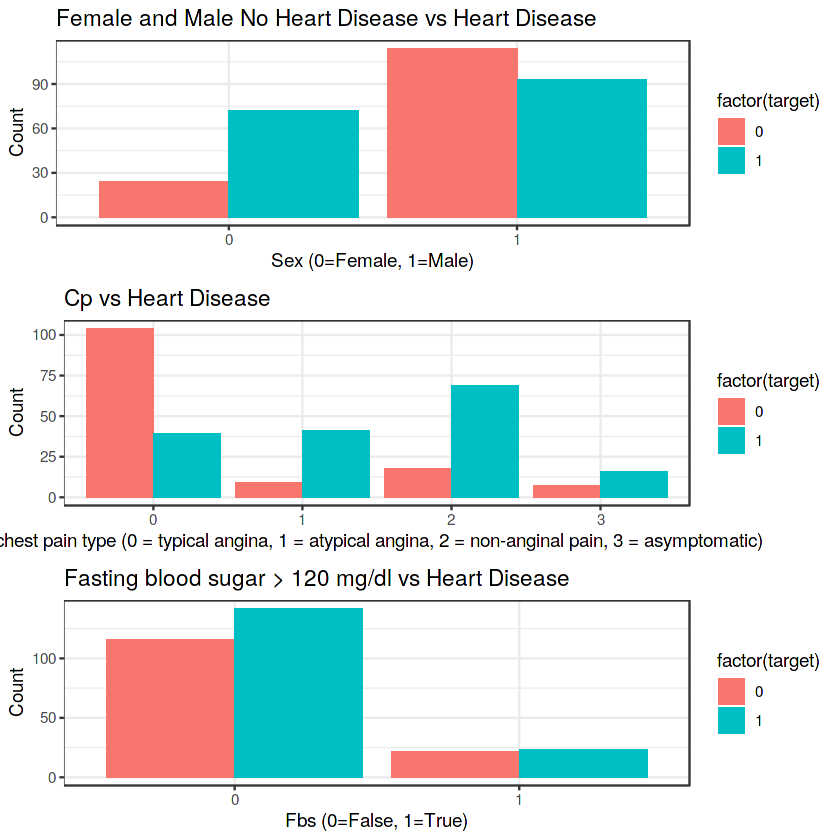

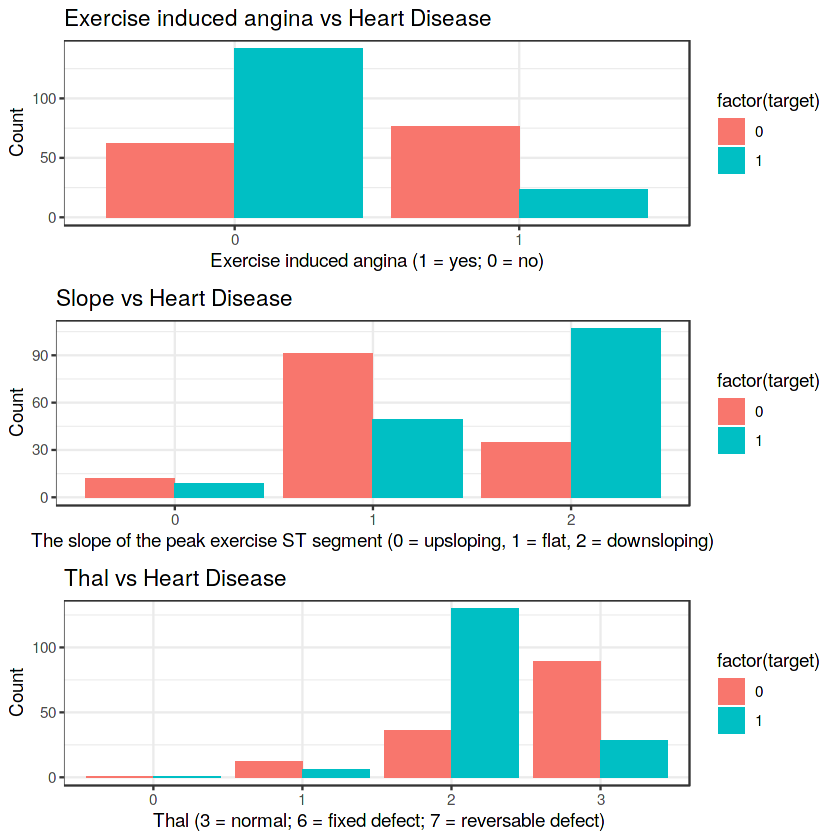

In [40]:
figure <- ggarrange(plotsextarget, plotcptarget, plotfbstarget, plottargetexang, plottargetslope,plottargetthal,
                    nrow = 3, ncol=1)
figure

In [41]:
#asociación variables categoricas
#heart <- read.csv("~/MASTER ESP/MIEBE SECOND SEMESTER/MACHINE LEARNING/FINAL PROJECT/heart.csv")
#head(heart)
#library("GoodmanKruskal")
#varSet1 <- c("sex", "cp", "exang","fbs","slope","thal","target")
#CarFrame1 <- subset(heart, select = varSet1)
#GKmatrix1 <- GKtauDataframe(CarFrame1)
#plot(GKmatrix1)
#heart$thal


Conclusion: In order to find if the categorical variables are independent a chi.squared test was done, as well as an asociation analysis. Therefore, it was concluded that because the asociation was less than the 28% it can be assumed that this variables are independent and are important to be used the way they are in the prediction models.

In [42]:
heartNoTarget <- heart[ , -which(names(heart) %in% c("target"))]
ncol(heartNoTarget)
colnames(heartNoTarget)

[1] 13

[1] "age"      "sex"      "cp"       "trestbps" "chol"     "fbs"     
 [7] "restecg"  "thalach"  "exang"    "oldpeak"  "slope"    "ca"      
[13] "thal"

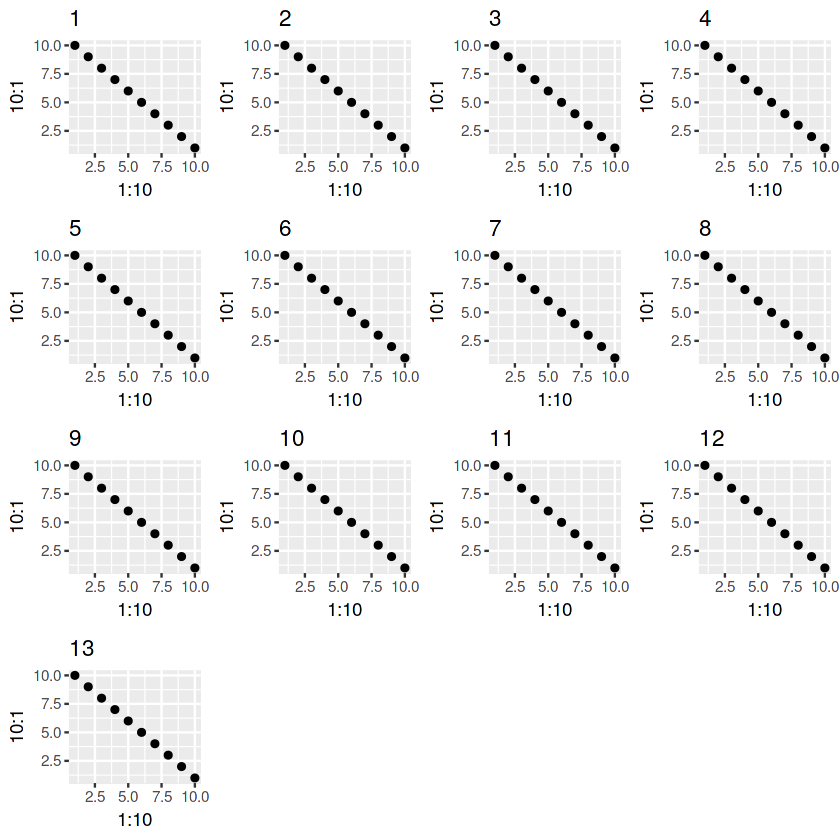

In [43]:
p <- list()
for(i in 1:ncol(heartNoTarget)){
  p[[i]] <- qplot(1:10,10:1,main=i)
}
do.call(grid.arrange,p)

In [44]:
targetBoxPlot <- list()
#columnsNoTarget <- colnames(heartNoTarget)
columnsNoTarget <- c('age','sex','cp','trestbps','chol')
#for (i in 1:ncol(heartNoTarget)){
for (i in 1:5){
    ggplot(data = heart, mapping = aes(x = factor(target), y = columnsNoTarget[i], color = target)) +
    geom_boxplot()+
    labs(title=paste("target vs", columnsNoTarget[i]))
}
#targetBoxPlot

#do.call(grid.arrange,targetBoxPlot)
#targetBoxPlot[1]
#targetBoxPlot[2]

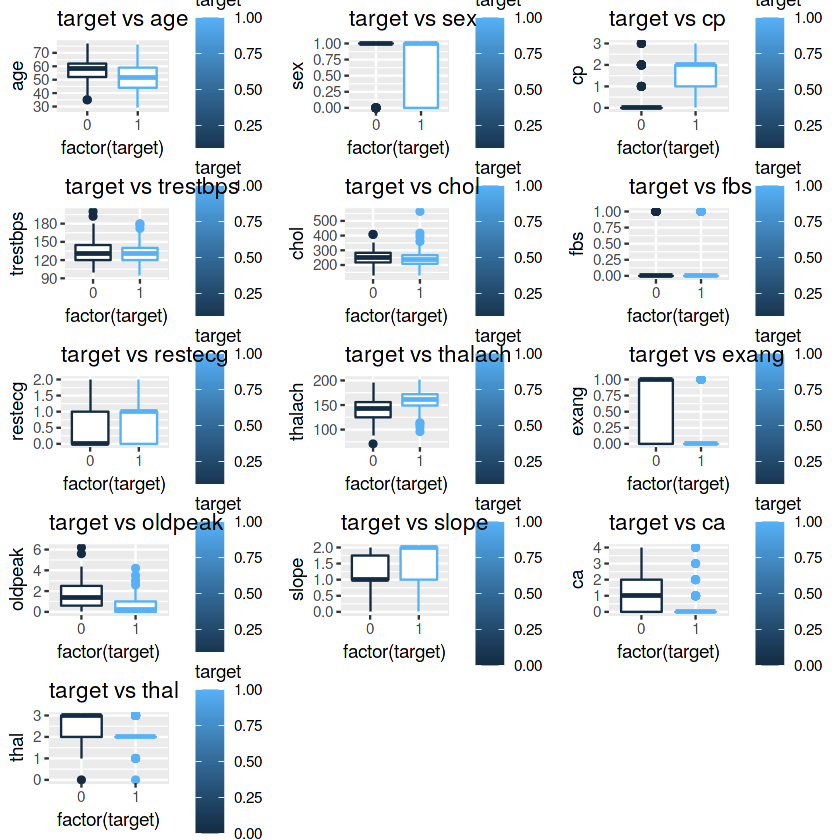

In [45]:
targetAge <- ggplot(data = heart, mapping = aes(x = factor(target), y = age, color = target)) +
     geom_boxplot()+
     labs(title="target vs age")

targetSex <- ggplot(data = heart, mapping = aes(x = factor(target), y = sex, color = target)) +
     geom_boxplot()+
     labs(title="target vs sex")

targetCp <- ggplot(data = heart, mapping = aes(x = factor(target), y = cp, color = target)) +
     geom_boxplot()+
     labs(title="target vs cp")

targetTrestbps <- ggplot(data = heart, mapping = aes(x = factor(target), y = trestbps, color = target)) +
     geom_boxplot()+
     labs(title="target vs trestbps")

targetChol <- ggplot(data = heart, mapping = aes(x = factor(target), y = chol, color = target)) +
     geom_boxplot()+
     labs(title="target vs chol")

targetFbs <- ggplot(data = heart, mapping = aes(x = factor(target), y = fbs, color = target)) +
     geom_boxplot()+
     labs(title="target vs fbs")
targetRestecg <- ggplot(data = heart, mapping = aes(x = factor(target), y = restecg, color = target)) +
     geom_boxplot()+
     labs(title="target vs restecg")

targetThalach <- ggplot(data = heart, mapping = aes(x = factor(target), y = thalach, color = target)) +
     geom_boxplot()+
     labs(title="target vs thalach")

targetExang <- ggplot(data = heart, mapping = aes(x = factor(target), y = exang, color = target)) +
     geom_boxplot()+
     labs(title="target vs exang")

targetOldpeak<- ggplot(data = heart, mapping = aes(x = factor(target), y = oldpeak, color = target)) +
     geom_boxplot()+
     labs(title="target vs oldpeak")

targetSlope <- ggplot(data = heart, mapping = aes(x = factor(target), y = slope, color = target)) +
     geom_boxplot()+
     labs(title="target vs slope")

targetCa <- ggplot(data = heart, mapping = aes(x = factor(target), y = ca, color = target)) +
     geom_boxplot()+
     labs(title="target vs ca")

targetThal <- ggplot(data = heart, mapping = aes(x = factor(target), y = thal, color = target)) +
     geom_boxplot()+
     labs(title="target vs thal")

grid.arrange(targetAge, targetSex, targetCp,
             targetTrestbps, targetChol, targetFbs,
             targetRestecg, targetThalach, targetExang,
             targetOldpeak, targetSlope, targetCa,
             targetThal, ncol = 3)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


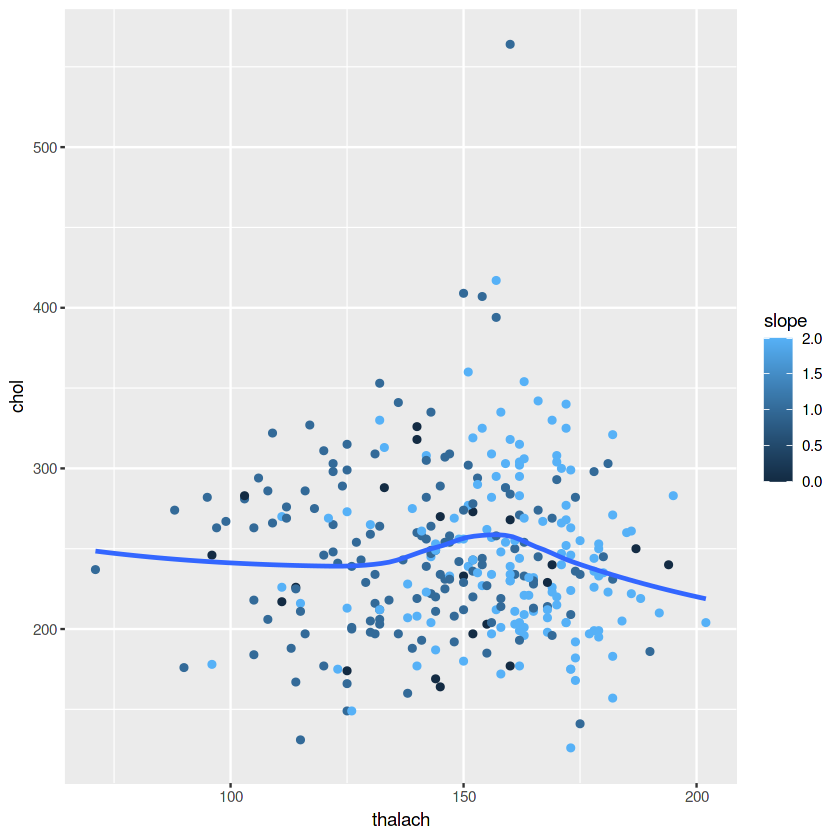

In [46]:
ggplot(data = heart, mapping = aes(x = thalach, y = chol, color = slope)) +
  geom_point() +
  geom_smooth(se = FALSE)

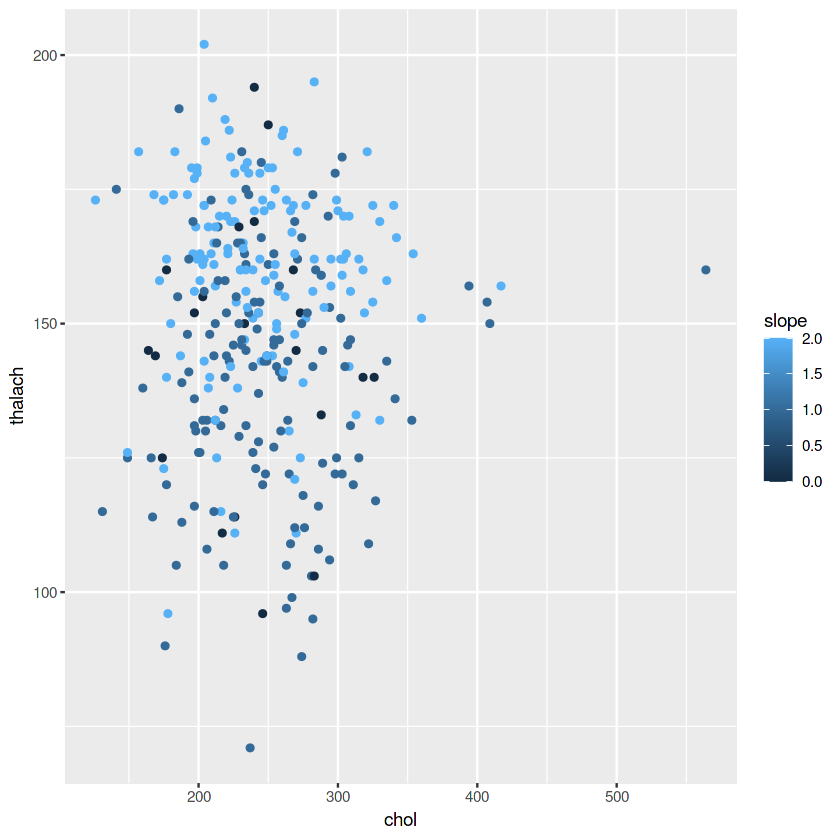

In [47]:
ggplot(data = heart, mapping = aes(x =chol , y = thalach)) +
  geom_point(mapping = aes(color = slope)) #+
  #geom_smooth()

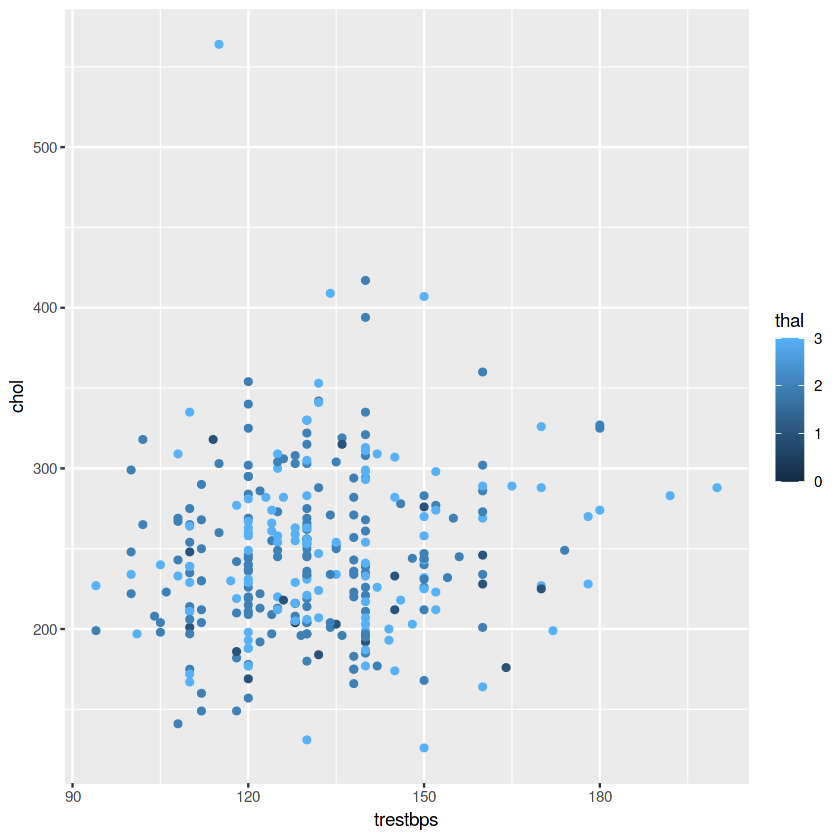

In [48]:
ggplot(data = heart, mapping = aes(x =trestbps , y = chol)) +
  geom_point(mapping = aes(color = thal)) #+
  #geom_smooth()

Conclusions

Not needed another treament for the features


#### Elliminating missing variables in "Thal"

In [49]:
heart$thal[heart$thal == "0"] <- NA
heart%>% count(thal)
heart_omit <- na.omit(heart)
heart_omit%>% count(thal)
dim(heart_omit)

thal,n
<int>,<int>
1,18
2,166
3,117
NA,2


thal,n
<int>,<int>
1,18
2,166
3,117


[1] 301  14

In [50]:
heart_omit

#### Intercept Model matrix

In [51]:
heartthal <- factor(heart_omit$thal)
dummies = model.matrix(~heartthal)

heartcp <- factor(heart_omit$cp)
dummies2 = model.matrix(~heartcp)

heartslope <- factor(heart_omit$slope)
dummies3 = model.matrix(~heartslope)
dummies3

,(Intercept),heartslope1,heartslope2
1,1,0,0
2,1,0,0
3,1,0,1
4,1,0,1
5,1,0,1
6,1,1,0
7,1,1,0
8,1,0,1
9,1,0,1
10,1,0,1


#### Label encoding for categorical data

In [52]:
result1 <- cbind(heart_omit,dummy(heart_omit$cp,sep="cp"))
result2 <- cbind(result1,dummy(result1$slope,sep="slope"))
heartlabel <- cbind(result2,dummy(result2$thal,sep="thal"))
head(heartlabel)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,⋯,NAcp0,NAcp1,NAcp2,NAcp3,NAslope0,NAslope1,NAslope2,NAthal1,NAthal2,NAthal3
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,63,1,3,145,233,1,0,150,0,2.3,⋯,0,0,0,1,1,0,0,1,0,0
2,37,1,2,130,250,0,1,187,0,3.5,⋯,0,0,1,0,1,0,0,0,1,0
3,41,0,1,130,204,0,0,172,0,1.4,⋯,0,1,0,0,0,0,1,0,1,0
4,56,1,1,120,236,0,1,178,0,0.8,⋯,0,1,0,0,0,0,1,0,1,0
5,57,0,0,120,354,0,1,163,1,0.6,⋯,1,0,0,0,0,0,1,0,1,0
6,57,1,0,140,192,0,1,148,0,0.4,⋯,1,0,0,0,0,1,0,1,0,0


In [53]:
str(heartlabel)

'data.frame':	301 obs. of  24 variables:
 $ age     : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : int  1 1 0 1 0 1 0 1 1 1 ...
 $ cp      : int  3 2 1 1 0 0 1 1 2 2 ...
 $ trestbps: int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs     : int  1 0 0 0 0 0 0 0 1 0 ...
 $ restecg : int  0 1 0 1 1 1 0 1 1 1 ...
 $ thalach : int  150 187 172 178 163 148 153 173 162 174 ...
 $ exang   : int  0 0 0 0 1 0 0 0 0 0 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slope   : int  0 0 2 2 2 1 1 2 2 2 ...
 $ ca      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thal    : int  1 2 2 2 2 1 2 3 3 2 ...
 $ target  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ NAcp0   : int  0 0 0 0 1 1 0 0 0 0 ...
 $ NAcp1   : int  0 0 1 1 0 0 1 1 0 0 ...
 $ NAcp2   : int  0 1 0 0 0 0 0 0 1 1 ...
 $ NAcp3   : int  1 0 0 0 0 0 0 0 0 0 ...
 $ NAslope0: int  1 1 0 0 0 0 0 0 0 0 ...
 $ NAslope1: int  0 0 0 0 0 1 1 0 0 0 ...
 $ NAslope2: int  0 0 1 1 1 0 0

#### Data normalization

Some algorithms in machine learning are more sensitive to the scale of data than others since the distance between the data points is very important.

In order to avoid this problem, a common scale (between 0 and 1) is often used which keeps the distributions of variables the same. This is often referred to as min-max scaling. The formula is shown below
$$z_{i}= \frac{x_{i}-min(x)}{max(x)-min(x)}$$

With $z_{i}$ as the new entry for each $x_{i}$ in the feature analyzed

In [54]:
#Function to normalize
normalize <- function(x) {
            return ((x - min(x)) / (max(x) - min(x)))
            }

In [55]:
# New dataframe with features normalized
(heartNorm <- as.data.frame(apply(heartlabel, 2, normalize)))

#### Splitting Data

In [56]:
train <- sample(1:nrow(heartNorm), nrow(heartNorm)/2)
heart_train <- heartNorm[train,]
heart_test<- heartNorm[-train,]
dim(heart_test)
dim(heart_train)


[1] 151  24

[1] 150  24

#### Linear Discriminant Analysis (LDA)

In [64]:
library("MASS")
linear <- lda(target~.,data=heartNorm)
linear
p <- predict(linear,heart_train)



Warning message in lda.default(x, grouping, ...):
“variables are collinear”

Call:
lda(target ~ ., data = heartNorm)

Prior probabilities of groups:
        0         1 
0.4551495 0.5448505 

Group means:
        age       sex        cp  trestbps      chol       fbs   restecg
0 0.5757299 0.8248175 0.1605839 0.3815590 0.2863714 0.1532847 0.2226277
1 0.4894563 0.5670732 0.4573171 0.3331224 0.2657312 0.1402439 0.2987805
    thalach     exang    oldpeak     slope         ca      thal     NAcp0
0 0.5189168 0.5474453 0.25641629 0.5839416 0.29379562 0.7810219 0.7518248
1 0.6697077 0.1402439 0.09461054 0.7957317 0.09146341 0.5670732 0.2378049
       NAcp1     NAcp2      NAcp3   NAslope0  NAslope1  NAslope2    NAthal1
0 0.06569343 0.1313869 0.05109489 0.08759124 0.6569343 0.2554745 0.08759124
1 0.25000000 0.4146341 0.09756098 0.05487805 0.2987805 0.6463415 0.03658537
    NAthal2   NAthal3
0 0.2627737 0.6496350
1 0.7926829 0.1707317

Coefficients of linear discriminants:
                 LD1
age      -0.08745309
sex      -0.59696473
cp        0.49123086
trestbps -0.69776

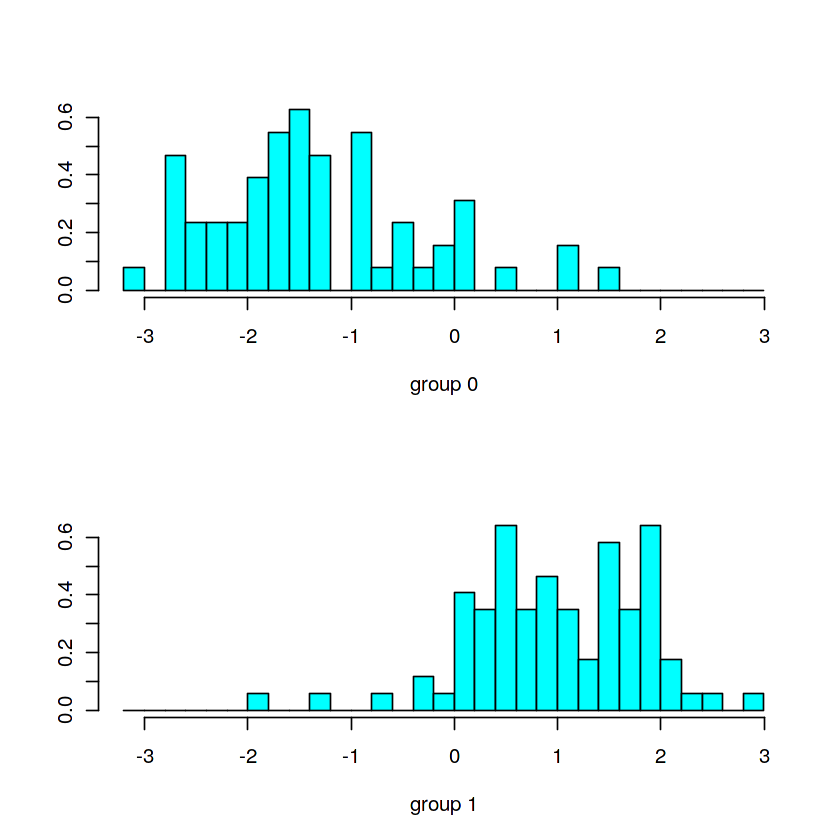

In [68]:
ldahist(data = p$x[, 1], g= heart_train$target)

In [81]:
#Confusion Matrix testing testing data
p1<- predict(linear, heart_train)$class
tab <- table(Predicted=p1, Actual=heart_train$target)
#tab
(AccuracyTrainLDA <- sum(diag(tab))/sum(tab))

#Confusion Matrix testing training data
p2<- predict(linear, heart_test)$class
tab2 <- table(Predicted=p2, Actual=heart_test$target)
(AccuracyTestLDA <- sum(diag(tab2))/sum(tab2))

[1] 0.9

[1] 0.807947

15 miss classifications in the model with training data and 29 with testing data, Accuracy of the model: 90% with training data and 80% with testing data

Conclusion: LDA do not help us to have a clear separation between the two groups as it can be seen in the past histogram, both variables were not maximally separated. LDA only makes sense in a multiclass setting.

#### Feature selection

#### PCA

In [59]:
heartNormPCA <-prcomp(x = heartNorm, scale = FALSE, center = TRUE)

In [60]:
summary(heartNormPCA)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     1.0096 0.6559 0.6092 0.45497 0.43673 0.38301 0.37393
Proportion of Variance 0.3226 0.1362 0.1174 0.06551 0.06036 0.04642 0.04425
Cumulative Proportion  0.3226 0.4587 0.5761 0.64165 0.70201 0.74843 0.79268
                           PC8     PC9    PC10    PC11   PC12    PC13    PC14
Standard deviation     0.35630 0.33544 0.32959 0.30225 0.2520 0.22614 0.18318
Proportion of Variance 0.04017 0.03561 0.03438 0.02891 0.0201 0.01618 0.01062
Cumulative Proportion  0.83285 0.86846 0.90284 0.93175 0.9518 0.96803 0.97865
                         PC15    PC16   PC17    PC18      PC19      PC20
Standard deviation     0.1529 0.13440 0.1219 0.10568 1.577e-16 1.115e-16
Proportion of Variance 0.0074 0.00572 0.0047 0.00353 0.000e+00 0.000e+00
Cumulative Proportion  0.9860 0.99177 0.9965 1.00000 1.000e+00 1.000e+00
                            PC21      PC22      PC23      PC24
Sta

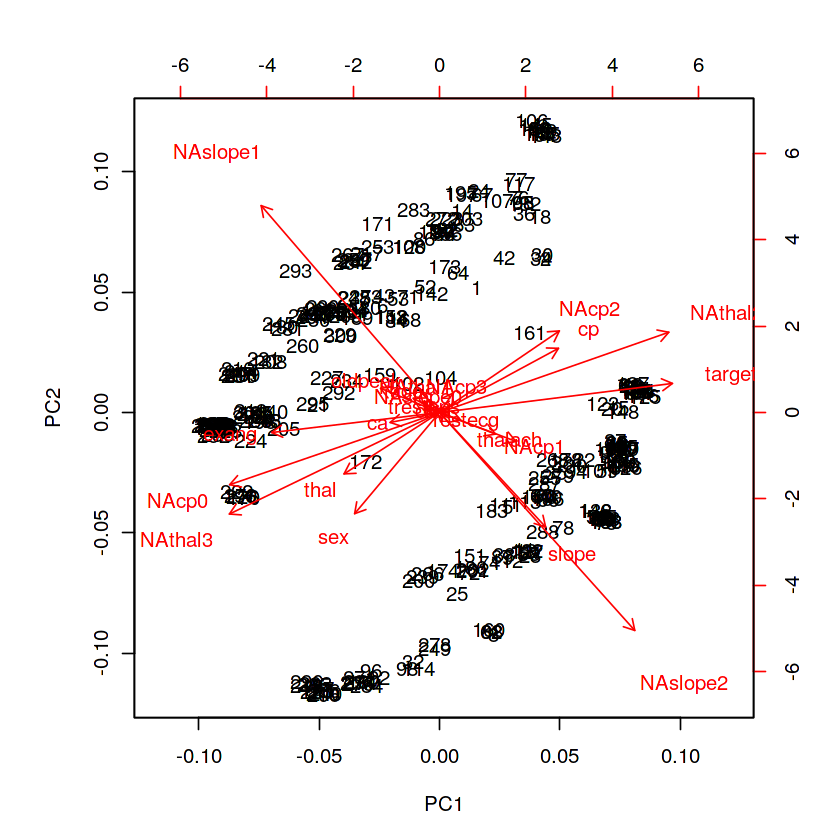

In [61]:
biplot(heartNormPCA)

It presents a more even distribution of the loading vectors (because of the scaling)

In [62]:
#Getting proportion of variance

In [75]:
#My test
data(iris)
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [83]:
dim(heart_numeric)

[1] 303   8


Attaching package: ‘psych’



The following object is masked from ‘package:Hmisc’:

    describe



The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



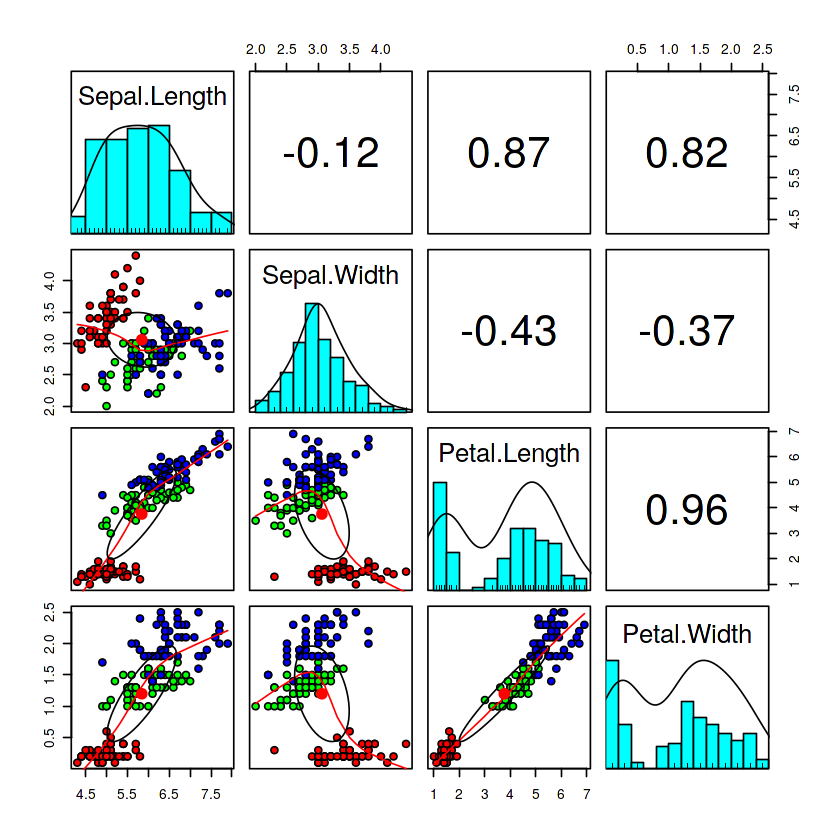

In [82]:
library(psych)
pairs.panels(iris[1:4],
            bg = c("red", "green","blue")[iris$Species],
            pch = 21)

In [1]:
pairs.panels(heart_numeric[1:8],
            bg = c("red", "green")[heart_numeric$sex],
            pch = 21)

ERROR: Error in pairs.panels(heart_numeric[1:8], bg = c("red", "green")[heart_numeric$sex], : could not find function "pairs.panels"
